Exercise: Implement a Parzen Windows classifier to classify the test data, calculating the accuracy after the whole procedure.
Try different kernel functions: rectangle, triangle, Gaussian and decreasing exponential

In [4]:
# Library imports
import numpy as np
from matplotlib import pyplot as plt

400 1


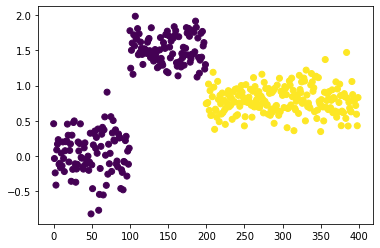

In [20]:
# 1. Load the data into memory

# Transpose x both in train and test

x_train = np.transpose(np.load('data_train.npy'))
x_test = np.transpose(np.load('data_test.npy'))
y_train, y_test = np.load('labels_train.npy'), np.load('labels_test.npy')

# Understand how many instances (rows) and features (columns) I have
nobj, nfeat = x_train.shape[0], x_train.shape[1]

# 2. Preliminary analysis
# Understand how many instances (rows) and features (columns) I have
print(nobj, nfeat)

# Visualize the data using a scatter plot
plt.scatter(range(len(x_train)), x_train[:,0], c=y_train)
plt.show()

In [27]:
# 3. Define the kernel functions (gamma)
# - Slide 10
def gamma(x, ktype='rect'):
  if ktype == 'rect':
        return 0.5 if abs(x) <= 1 else 0
  elif ktype == 'tri':
        return 1-abs(x) if abs(x) <= 1 else 0
  elif ktype == 'gaussian':
        return ((2*np.pi)**(1/2))*np.exp(-0.5*x**2)
  elif ktype == 'dexp':
        return 0.5*np.exp(-abs(x))
  else:
        raise ValueError('Kernel type not recognized. Possible options are: ' +
        '"rect", "tri", "gaussian", "dexp".')


# 4. Set hyperparameters
h = 0.2
ktype = 'gaussian'

# 5. Divide the train data based on the classes
x1_train = x_train[y_train==1]
x2_train = x_train[y_train==2]

# 6. Estimate the likelihood through the Parzen Windows method (Slide 9)
# For each test item, calculate the likelihood for each of the 2 classes. Append
# to predicted the class with the higher likelihood
predicted = []
for x_te in x_test[:,0]:
  g1, g2 = [], []
  for x1 in x1_train[:,0]:
    g1 = np.append(g1,gamma((x_te-x1)/h,ktype))
  for x2 in x2_train[:,0]:
    g2 = np.append(g2,gamma((x_te-x2)/h,ktype))
  l1 = np.mean(g1)/h # Likelihood of class 1
  l2 = np.mean(g2)/h # Likelihood of class 2
  predicted = np.append(predicted, 1 if l1 > l2 else 2)

# 7. Calculate accuracy
accuracy = np.sum(predicted == y_test) / len(y_test)
print(f'Accuracy with h={h} and kernel function {ktype}: {accuracy*100}%')

Accuracy with h=0.2 and kernel function gaussian: 86.0%
